In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stat
import statsmodels.api as smf
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import KFold , GridSearchCV, train_test_split, StratifiedKFold
from sklearn.metrics import confusion_matrix as cm, accuracy_score as ac, classification_report as report,\
roc_curve, roc_auc_score , recall_score , precision_score, f1_score

In [2]:
! pip install streamlit -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 38.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.7 MB/s eta 0:00:00


In [3]:
## For the sake of debugging
import pdb

## Data structures
import numpy as np
import pandas as pd

## Visualisation
import seaborn as sns
import matplotlib.pyplot as plt

## Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer

## Models
# Tuning parameters
from sklearn.model_selection import GridSearchCV, cross_val_score



## Evaluation
from sklearn.metrics import make_scorer, accuracy_score, confusion_matrix

# Magic method used for displaying images directly in Jupyter Notebook
%matplotlib inline

In [4]:
# Importing Dataset
raw_data = pd.read_csv('/content/Titanic_train.csv')
raw_data



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Data Exploration

In [5]:
# print shape of dataset with rows and columns
print(raw_data.shape)
# print top 5 records
raw_data.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
raw_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
raw_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [9]:
# List of Numerical Variables
numerical_features=[feature for feature in raw_data.columns if raw_data[feature].dtypes != 'O']

print('Number of numerical variables:', len(numerical_features))

# Visualize the numerical variables
raw_data[numerical_features].head()

Number of numerical variables: 7


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [10]:
year_feature = [] # You need to define year_feature
discrete_feature=[feature for feature in numerical_features if len(raw_data[feature].unique())<25 and feature not in year_feature]
print('Discrete Variables Count: {}'.format(len(discrete_feature)))

Discrete Variables Count: 4


In [11]:
continuous_feature = [feature for feature in numerical_features if feature not in discrete_feature and feature not in year_feature]
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 3


In [12]:
# Check for data types before correlation
print(raw_data.dtypes)

# Handle non-numeric columns before correlation
for col in raw_data.columns:
    if raw_data[col].dtype == 'object':
        # Convert to categorical codes if needed
        raw_data[col] = raw_data[col].astype('category').cat.codes
        print(f"Converted column '{col}' to category codes")


# Calculate correlation matrix
correlation_matrix = raw_data.corr()

correlation_matrix

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
Converted column 'Name' to category codes
Converted column 'Sex' to category codes
Converted column 'Ticket' to category codes
Converted column 'Cabin' to category codes
Converted column 'Embarked' to category codes


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.038559,0.042939,0.036847,-0.057527,-0.001652,-0.056554,0.012658,-0.000637,0.012985
Survived,-0.005007,1.000000,-0.338481,-0.057343,-0.543351,-0.077221,-0.035322,0.081629,-0.164549,0.257307,0.276235,-0.176509
Pclass,-0.035144,-0.338481,1.000000,0.052831,0.131900,-0.369226,0.083081,0.018443,0.319869,-0.549500,-0.537419,0.173511
Name,-0.038559,-0.057343,0.052831,1.000000,0.020314,0.062583,-0.017230,-0.049105,0.047348,-0.049173,0.003122,-0.010633
Sex,0.042939,-0.543351,0.131900,0.020314,1.000000,0.093254,-0.114631,-0.245489,0.059372,-0.182333,-0.137704,0.118492
Age,0.036847,-0.077221,-0.369226,0.062583,0.093254,1.000000,-0.308247,-0.189119,-0.075934,0.096067,0.167432,-0.044830
SibSp,-0.057527,-0.035322,0.083081,-0.017230,-0.114631,-0.308247,1.000000,0.414838,0.079461,0.159651,-0.024829,0.071480
Parch,-0.001652,0.081629,0.018443,-0.049105,-0.245489,-0.189119,0.414838,1.000000,0.020003,0.216225,0.033585,0.043351
Ticket,-0.056554,-0.164549,0.319869,0.047348,0.059372,-0.075934,0.079461,0.020003,1.000000,-0.013885,-0.176515,0.011146
Fare,0.012658,0.257307,-0.549500,-0.049173,-0.182333,0.096067,0.159651,0.216225,-0.013885,1.000000,0.310987,-0.230365


In [13]:
raw_data.corr()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.038559,0.042939,0.036847,-0.057527,-0.001652,-0.056554,0.012658,-0.000637,0.012985
Survived,-0.005007,1.000000,-0.338481,-0.057343,-0.543351,-0.077221,-0.035322,0.081629,-0.164549,0.257307,0.276235,-0.176509
Pclass,-0.035144,-0.338481,1.000000,0.052831,0.131900,-0.369226,0.083081,0.018443,0.319869,-0.549500,-0.537419,0.173511
Name,-0.038559,-0.057343,0.052831,1.000000,0.020314,0.062583,-0.017230,-0.049105,0.047348,-0.049173,0.003122,-0.010633
Sex,0.042939,-0.543351,0.131900,0.020314,1.000000,0.093254,-0.114631,-0.245489,0.059372,-0.182333,-0.137704,0.118492
Age,0.036847,-0.077221,-0.369226,0.062583,0.093254,1.000000,-0.308247,-0.189119,-0.075934,0.096067,0.167432,-0.044830
SibSp,-0.057527,-0.035322,0.083081,-0.017230,-0.114631,-0.308247,1.000000,0.414838,0.079461,0.159651,-0.024829,0.071480
Parch,-0.001652,0.081629,0.018443,-0.049105,-0.245489,-0.189119,0.414838,1.000000,0.020003,0.216225,0.033585,0.043351
Ticket,-0.056554,-0.164549,0.319869,0.047348,0.059372,-0.075934,0.079461,0.020003,1.000000,-0.013885,-0.176515,0.011146
Fare,0.012658,0.257307,-0.549500,-0.049173,-0.182333,0.096067,0.159651,0.216225,-0.013885,1.000000,0.310987,-0.230365


# Exploratory Data Analysis

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 [Text(0.5, 0, 'PassengerId'),
  Text(1.5, 0, 'Survived'),
  Text(2.5, 0, 'Pclass'),
  Text(3.5, 0, 'Name'),
  Text(4.5, 0, 'Sex'),
  Text(5.5, 0, 'Age'),
  Text(6.5, 0, 'SibSp'),
  Text(7.5, 0, 'Parch'),
  Text(8.5, 0, 'Ticket'),
  Text(9.5, 0, 'Fare'),
  Text(10.5, 0, 'Cabin'),
  Text(11.5, 0, 'Embarked')])

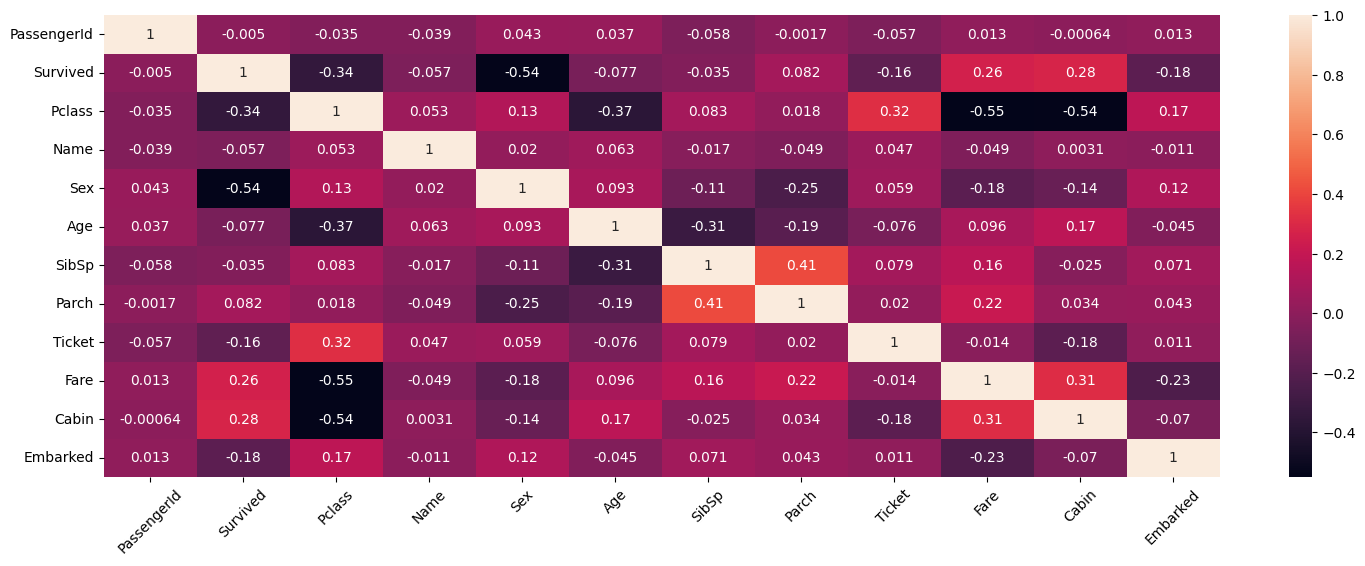

In [14]:
fig= plt.figure(figsize=(18, 6))
sns.heatmap(raw_data.corr(), annot=True);
plt.xticks(rotation=45)

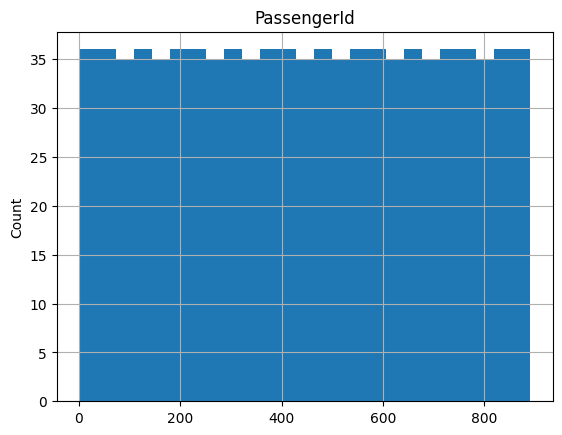

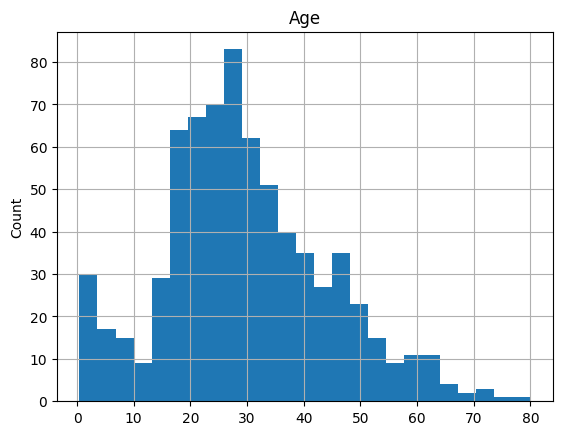

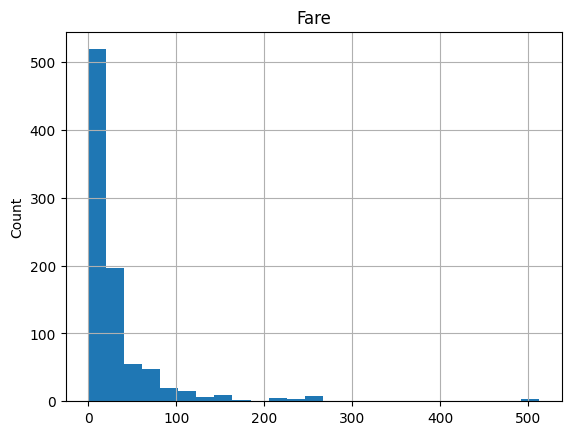

In [15]:
for feature in continuous_feature:
    data=raw_data.copy()
    data[feature].hist(bins=25)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

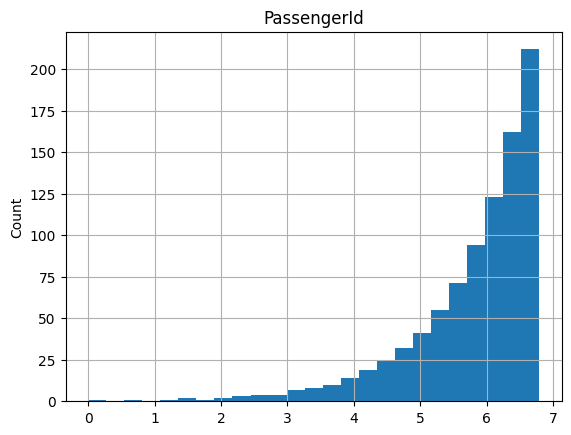

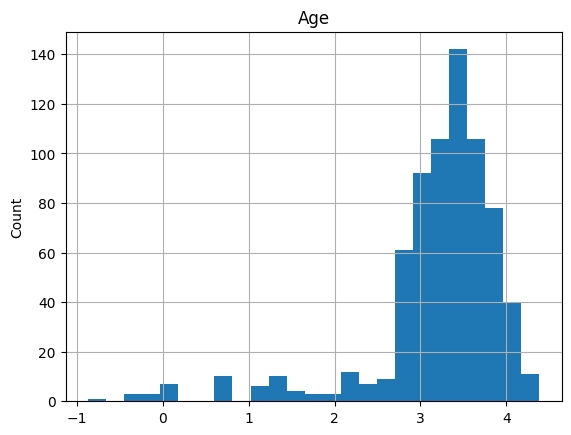

In [16]:
for feature in continuous_feature:
    data=raw_data.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data[feature].hist(bins=25)
        plt.ylabel('Count')
        plt.title(feature)
        plt.show()

Dependencies between data
A key to creating a good model is learning how does the data correlate - what are the dependencies between various attributes.

In [17]:
train_df = raw_data.copy()

**Sex**

There is a disparity between survivors depending on the sex - women were more likely to survive.

Text(0.5, 1.0, 'Survivors depending on the sex')

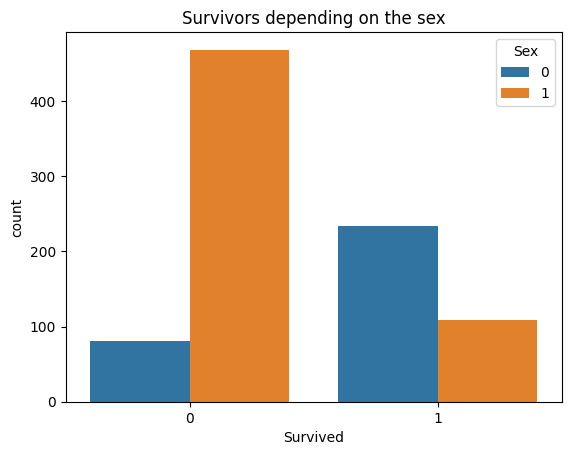

In [18]:
sns.countplot(x='Survived', hue='Sex', data=train_df)
plt.title('Survivors depending on the sex')

**Embarked**

Most of the casualties were embarked in 'S'.

Text(0.5, 1.0, 'Survivors depending on the emberkment place')

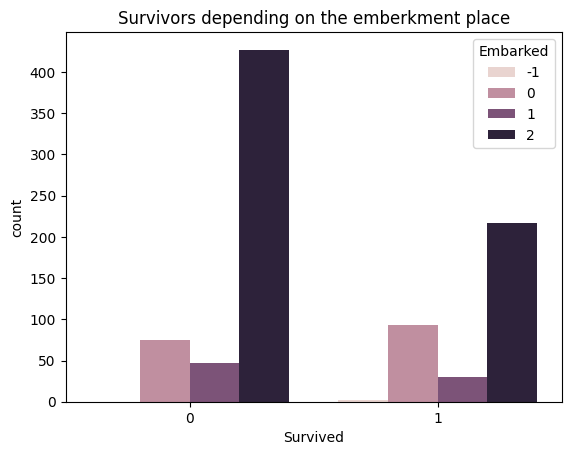

In [19]:
sns.countplot(x='Survived', hue='Embarked', data=train_df)
plt.title('Survivors depending on the emberkment place')

**Pclass**

Passengers from the 3rd class were more likely to die during the cruise - they were the most of the casualties. The number of people that survived, depending on the class, was rather even.

Text(0.5, 1.0, 'Survivors depending on the class')

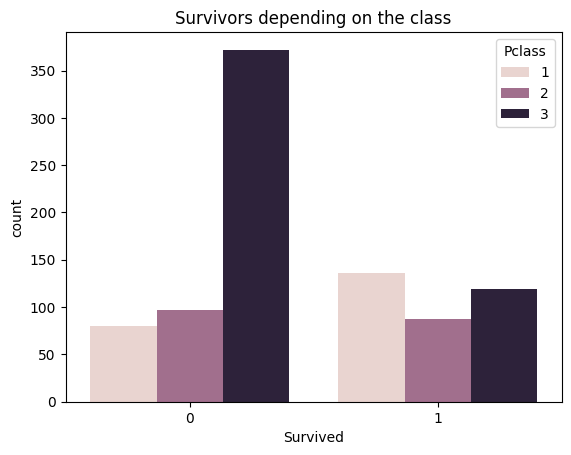

In [20]:
sns.countplot(x='Survived', hue='Pclass', data=train_df)
plt.title('Survivors depending on the class')

**Age**

Male:

most of the survivors were between ages 20 to 40
Female:

more survivors overall
the difference between survival rate based on age is smaller than in case of men

<Axes: xlabel='Sex', ylabel='Age'>

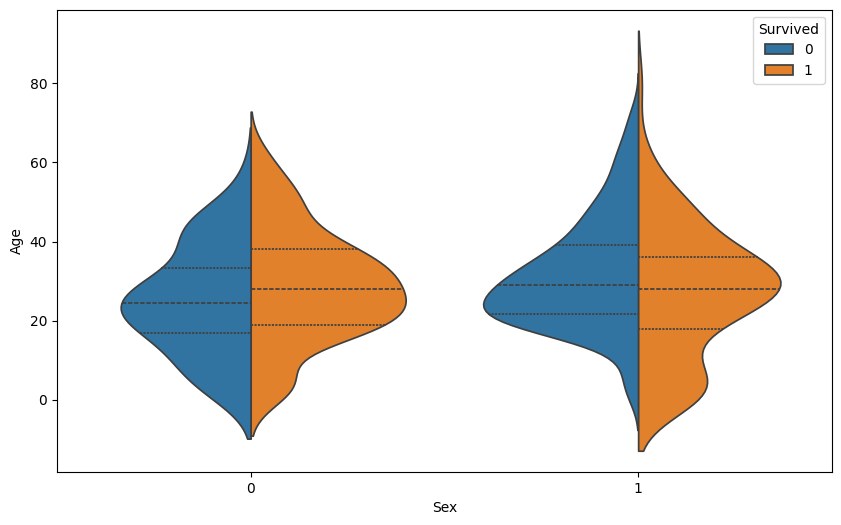

In [21]:
plt.figure(figsize=(10,6))
sns.violinplot(x='Sex', y='Age', hue='Survived', data=train_df, split=True, inner="quartile")

**Fare**

It seems that passengers with cheaper tickets were more likely to die. Binning of this data might be difficult since the data is far from being normally distributed.

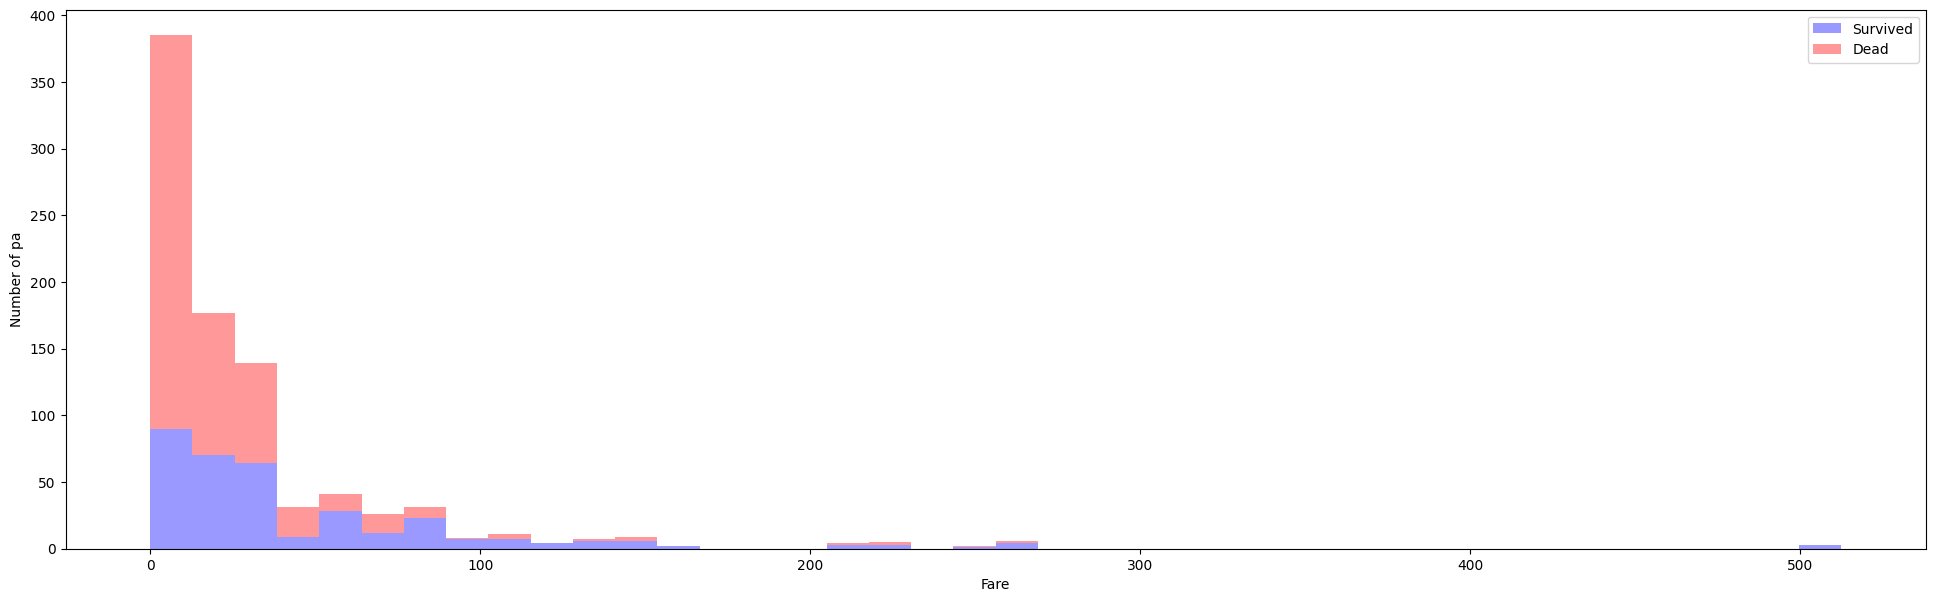

In [22]:
survived = train_df[train_df['Survived'] == 1]['Fare']
dead = train_df[train_df['Survived'] == 0]['Fare']

figure = plt.figure(figsize=(24,7))
plt.hist([survived, dead], stacked=True, color=['b','r'], alpha=0.4, bins=40, label=['Survived', 'Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of pa')
plt.legend()

# Data Preprocessing

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the datasets
train_data = pd.read_csv('/content/Titanic_train.csv')
test_data = pd.read_csv('/content/Titanic_test.csv')

# Combine datasets for consistent preprocessing
combined_data = pd.concat([train_data, test_data], ignore_index=True)

# Separate features (X) and target (y) if present, for the combined data, it will be handled later
if 'Survived' in combined_data.columns:
    X = combined_data.drop('Survived', axis=1)
    y = combined_data['Survived']
else:
    X = combined_data
    y = None

# Drop unnecessary columns
X = X.drop(['PassengerId', 'Ticket', 'Name'], axis=1)

# Identify numerical and categorical features
numerical_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# --- Numerical Feature Pipeline ---
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Handle missing values with median
    ('scaler', StandardScaler())  # Scale numerical features
])

# --- Categorical Feature Pipeline ---
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values with most frequent
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # One-hot encode categorical features
])

# --- Combine Pipelines with ColumnTransformer ---
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'  # Specify how to handle remaining columns
)

# Apply the preprocessing to the combined data
X_preprocessed = preprocessor.fit_transform(X)

# Get the names of the preprocessed columns
numerical_columns_preprocessed = numerical_features
categorical_columns_preprocessed = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)
# Convert numpy array to list
categorical_columns_preprocessed = categorical_columns_preprocessed.tolist()
all_columns_preprocessed = numerical_columns_preprocessed + categorical_columns_preprocessed
#Get the columns from the dataframe which were not transformed
columns_not_transformed = [col for col in X.columns if col not in numerical_features + categorical_features]
#Add the columns not transformed to the names of all the columns preprocessed
all_columns_preprocessed += columns_not_transformed

X_preprocessed_df = pd.DataFrame(X_preprocessed, columns=all_columns_preprocessed)

# Split the data back into train and test sets based on the original indices
train_data_preprocessed = X_preprocessed_df[:len(train_data)]
test_data_preprocessed = X_preprocessed_df[len(train_data):]
if y is not None:
    y_preprocessed = y[:len(train_data)]
    X_train = train_data_preprocessed
    y_train = y_preprocessed
else:
    X_train = train_data_preprocessed
    y_train = None

# Display the first five preprocessed training data
display(X_train.head())

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A10,Cabin_A11,Cabin_A14,...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,0.841916,-0.581628,0.481288,-0.445,-0.503291,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-1.546098,0.658652,0.481288,-0.445,0.734744,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.841916,-0.271558,-0.479087,-0.445,-0.490240,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-1.546098,0.426099,0.481288,-0.445,0.383183,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.841916,0.426099,-0.479087,-0.445,-0.487824,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [24]:
# Split the training set into training and validation sets
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_split, y_train_split)

# Predict on the validation set
y_pred = logreg.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy:.4f}")




Validation Accuracy: 0.8212


In [27]:
# Print classification report
print("\nClassification Report:")
print(report(y_val, y_pred))




Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.87      0.85       105
         1.0       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179




Confusion Matrix:
[[91 14]
 [18 56]]


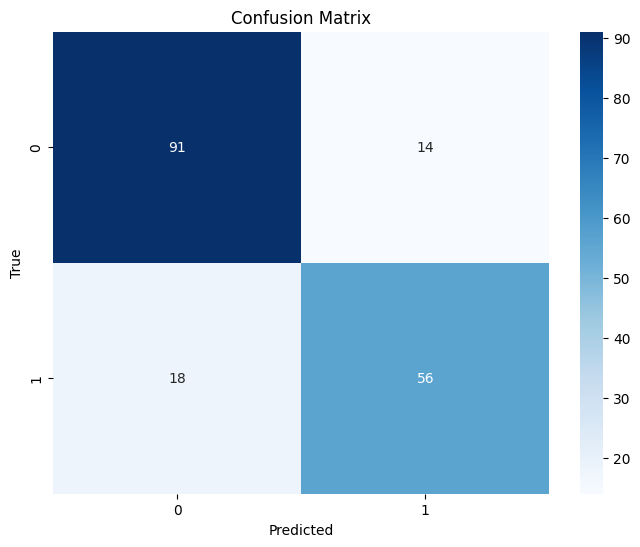

In [28]:
# Print confusion matrix
cm = confusion_matrix(y_val, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

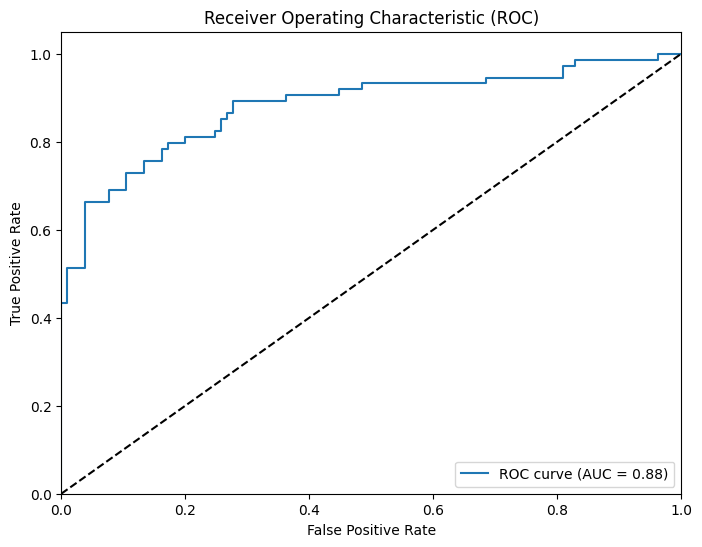

In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming you have y_val (true labels) and y_pred_prob (predicted probabilities)
# If you don't have probabilities, you can get them using:
y_pred_prob = logreg.predict_proba(X_val)[:, 1]  # Probability of the positive class


fpr, tpr, thresholds = roc_curve(y_val, y_pred_prob)
roc_auc = roc_auc_score(y_val, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Random classifier line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

Deployment

In [30]:
!wget -q -O - ipv4.icanhazip.com

34.106.56.170
